# 🚀 1. Project Overview

- This notebook presents a comprehensive workflow for a machine learning classification problem using a rich tabular dataset. The workflow includes data loading, exploratory data analysis (EDA), preprocessing, feature engineering, model training, and evaluation. The goal is to predict a target variable based on a variety of demographic, financial, and behavioral features.

# 📁 2. Dataset Description

- The dataset contains 40+ features representing individual and household characteristics, financial details, credit history, and economic indicators. Below is a summary of the key columns:

- **Demographics:** Age, Gender, Marital Status, Number of Dependents, Household Size, Education Level, Occupation, Years in Current Job, City or Region of Residence.

- **Financials:** Income Level, Credit Score, Number of Credit Inquiries, Average Monthly Expenses, Credit Card Usage, Savings Rate, Number of Loans Taken, Mortgage Information, Investment Accounts, Emergency Fund Status, Debt-to-Income Ratio, Bank Account Activity, Tax Filing History, Utility Bills Payment History, Number of Credit Cards Held.

- **Risk & Stability:** Previous Bankruptcy Status, Loan Delinquencies History, Bankruptcy History, Financial Stability of Parents, Residency Stability, Job Loss, Divorce History, Major Medical Emergency, Adoption History, Health-related Legal Claims, Domestic or International Relocation.

- **Health & Insurance:** Health Condition, Family Health History, Life Insurance Adequacy.

- **Economic Environment:** Local Unemployment Rate, Inflation Rate, Interest Rates, Economic Sentiment.

- **Behavioral & Planning:** Risk Tolerance, Financial Planner Involvement, Long-term Financial Goals, Risk Profile.

### Basic imports 

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
#Modeling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Warnings and display 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns' , None)

<h3>Load dataset 

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Age,Gender,Marital Status,Number of Dependents,Household Size,Education Level,Occupation,Years in Current Job,Income Level,Credit Score,Number of Credit Inquiries,Housing Status,City or Region of Residence,Previous Bankruptcy Status,Health Condition,Family Health History,Marital History,Residency Stability,Financial Stability of Parents,Average Monthly Expenses,Credit Card Usage,Savings Rate,Number of Loans Taken,Mortgage Information,Investment Accounts,Emergency Fund Status,Loan Delinquencies History,Bank Account Activity,Tax Filing History,Utility Bills Payment History,Number of Credit Cards Held,Job Loss,Divorce History,Major Medical Emergency,Adoption History,Bankruptcy History,Health-related Legal Claims,Domestic or International Relocation,Local Unemployment Rate,Inflation Rate,Interest Rates,Economic Sentiment,Risk Tolerance,Financial Planner Involvement,Debt-to-Income Ratio,Life Insurance Adequacy,Long-term Financial Goals,Risk Profile
0,56,1,2,4,5,2,2,11,0,425,1,0,1,0,2,1,0,0,1,4353,1543,0.120379,2,212044,53433,12910,4,39,0,0,2,1,1,0,1,0,0,1,8.302827,0.642391,6.393131,0,3,1,0.326709,0,2,1
1,69,0,1,2,6,1,0,18,2,569,5,0,1,1,2,0,1,1,0,4275,766,0.428920,3,408619,92968,9932,1,30,1,1,3,0,1,0,1,1,0,1,1.295888,4.587659,5.369076,2,4,0,0.875858,1,1,2
2,46,1,2,1,2,0,4,17,2,717,6,1,1,1,0,0,2,0,1,3739,2064,0.639184,3,3707,91788,15805,1,27,0,0,2,1,1,0,1,0,1,1,5.524170,2.491157,4.059213,1,7,0,0.433555,1,1,0
3,32,0,0,2,6,0,0,20,2,586,8,0,1,1,1,1,2,1,1,4025,2941,0.687045,4,327741,95564,8918,0,2,1,0,1,1,0,1,0,1,0,1,5.985150,3.214968,0.592691,0,6,1,0.071399,0,1,1
4,60,0,1,1,5,0,2,18,0,675,9,0,0,0,0,1,2,1,0,4044,895,0.489271,2,270923,1032,14552,2,1,0,1,3,1,1,0,0,1,0,0,2.511423,0.323239,3.687253,0,7,0,0.364897,1,2,0


## 📋2.1 Dataset Structure and Summary

The training dataset consists of **100,000 rows** and **48 columns**. Each row represents an individual data point containing demographic, financial, behavioral, and risk-related features.

### 🧾2.2 Key Points:
- **Total Entries:** 100,000  
- **Total Features:** 48  
- **Data Types:**  
  - `int64`: 43 columns  
  - `float64`: 5 columns  
- **Missing Values:** None — all features are fully populated  
- **Memory Usage:** ~36.6 MB

This indicates a **clean and dense dataset**, making it well-suited for supervised machine learning tasks like classification.

Each feature will be explored in more detail during the **EDA and preprocessing stages**.


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Age                                   100000 non-null  int64  
 1   Gender                                100000 non-null  int64  
 2   Marital Status                        100000 non-null  int64  
 3   Number of Dependents                  100000 non-null  int64  
 4   Household Size                        100000 non-null  int64  
 5   Education Level                       100000 non-null  int64  
 6   Occupation                            100000 non-null  int64  
 7   Years in Current Job                  100000 non-null  int64  
 8   Income Level                          100000 non-null  int64  
 9   Credit Score                          100000 non-null  int64  
 10  Number of Credit Inquiries            100000 non-null  int64  
 11  H

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   20000 non-null  int64  
 1   Gender                                20000 non-null  int64  
 2   Marital Status                        20000 non-null  int64  
 3   Number of Dependents                  20000 non-null  int64  
 4   Household Size                        20000 non-null  int64  
 5   Education Level                       20000 non-null  int64  
 6   Occupation                            20000 non-null  int64  
 7   Years in Current Job                  20000 non-null  int64  
 8   Income Level                          20000 non-null  int64  
 9   Credit Score                          20000 non-null  int64  
 10  Number of Credit Inquiries            20000 non-null  int64  
 11  Housing Status 

In [8]:
train.describe()

,Age,Gender,Marital Status,Number of Dependents,Household Size,Education Level,Occupation,Years in Current Job,Income Level,Credit Score,Number of Credit Inquiries,Housing Status,City or Region of Residence,Previous Bankruptcy Status,Health Condition,Family Health History,Marital History,Residency Stability,Financial Stability of Parents,Average Monthly Expenses,Credit Card Usage,Savings Rate,Number of Loans Taken,Mortgage Information,Investment Accounts,Emergency Fund Status,Loan Delinquencies History,Bank Account Activity,Tax Filing History,Utility Bills Payment History,Number of Credit Cards Held,Job Loss,Divorce History,Major Medical Emergency,Adoption History,Bankruptcy History,Health-related Legal Claims,Domestic or International Relocation,Local Unemployment Rate,Inflation Rate,Interest Rates,Economic Sentiment,Risk Tolerance,Financial Planner Involvement,Debt-to-Income Ratio,Life Insurance Adequacy,Long-term Financial Goals,Risk Profile
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,48.525990,0.501320,1.002370,1.999230,4.498360,0.998540,1.994090,14.531440,1.001980,575.442170,4.492990,0.502030,0.999840,0.499730,0.998140,0.997950,1.00051,0.500860,0.498630,2749.526120,2501.950520,0.498300,1.992260,250672.702500,50003.637050,10048.587290,1.99723,25.030660,0.497290,0.500060,2.499900,0.499520,0.497090,0.499150,0.501410,0.500370,0.500310,0.499250,5.002140,2.503508,3.500384,0.999500,4.996360,0.503880,0.500812,0.502790,0.999760,0.999250
std,17.886768,0.500001,0.814721,1.414075,1.797123,0.817597,1.411621,8.655584,0.816604,158.861066,2.870469,0.499998,0.816056,0.500002,0.816886,0.816733,0.81416,0.500002,0.500001,1296.951172,1446.160647,0.288477,1.414843,144489.027872,28853.305579,5761.834989,1.41316,14.132622,0.499995,0.500002,1.117655,0.500002,0.499994,0.500002,0.500001,0.500002,0.500002,0.500002,2.889969,1.445018,2.025346,0.815565,2.576426,0.499987,0.288860,0.499995,0.815357,0.815755
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,500.000000,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,0.000137,0.000016,0.000000,1.000000,0.000000,0.000005,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,7.000000,0.000000,438.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1625.000000,1247.000000,0.248323,1.000000,125125.250000,25051.500000,5087.750000,1.00000,13.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.493658,1.254031,1.745634,0.000000,3.000000,0.000000,0.250474,0.000000,0.000000,0.000000
50%,48.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,15.000000,1.000000,576.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,2751.000000,2508.000000,0.499087,2.000000,250788.000000,49947.500000,10075.500000,2.00000,25.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,5.005966,2.502484,3.502398,1.000000,5.000000,1.000000,0.502195,1.000000,1.000000,1.000000
75%,64.000000,1.000000,2.000000,3.000000,6.000000,2.000000,3.000000,22.000000,2.000000,714.000000

In [9]:
train.isnull().sum().sort_values(ascending=False)

Age                                     0
Gender                                  0
Loan Delinquencies History              0
Bank Account Activity                   0
Tax Filing History                      0
Utility Bills Payment History           0
Number of Credit Cards Held             0
Job Loss                                0
Divorce History                         0
Major Medical Emergency                 0
Adoption History                        0
Bankruptcy History                      0
Health-related Legal Claims             0
Domestic or International Relocation    0
Local Unemployment Rate                 0
Inflation Rate                          0
Interest Rates                          0
Economic Sentiment                      0
Risk Tolerance                          0
Financial Planner Involvement           0
Debt-to-Income Ratio                    0
Life Insurance Adequacy                 0
Long-term Financial Goals               0
Emergency Fund Status             

## 🔍3.1 Missing Values Analysis

We performed a check for **missing values** across all columns in the dataset.  
The output indicates that **none of the columns contain missing values** — all features are fully populated.

✅ This confirms:
- No need for imputation or data filling techniques  
- Clean and ready-to-use data for modeling  

### 🧾3.2 Sample of Columns Checked:
- `Age`, `Gender`, `Risk Profile`, `Credit Card Usage`  
- `Job Loss`, `Bankruptcy History`, `Health-related Legal Claims`  
- `Economic Sentiment`, `Emergency Fund Status`, `Savings Rate`  

This high data quality ensures a **smooth modeling pipeline** without additional preprocessing steps for null handling.


In [10]:
#Target Distribution 
target_dist = train['Risk Profile'].value_counts(normalize=True) * 100
print(f'Risk Profile Distribution = ' , target_dist)

Risk Profile Distribution =  Risk Profile
1    33.455
0    33.310
2    33.235
Name: proportion, dtype: float64


## 🧮4. Target Variable Distribution – `Risk Profile`

The target variable `Risk Profile` is a **multi-class classification label** representing financial risk levels. It contains **3 classes**, each roughly equally represented in the dataset:

| Class | Description               | Proportion (%) |
|-------|---------------------------|----------------|
| 0     | Low Risk                  | 33.31%         |
| 1     | Medium Risk               | 33.46%         |
| 2     | High Risk                 | 33.23%         |

📌 **4.1 Key Insight:**
- The distribution is **highly balanced**, which is ideal for training a classification model.
- There is **no significant class imbalance**, so we don't need special handling techniques like oversampling or class weighting.

This balanced nature ensures that the model won’t be biased toward any specific risk group.


<function matplotlib.pyplot.show(close=None, block=None)>

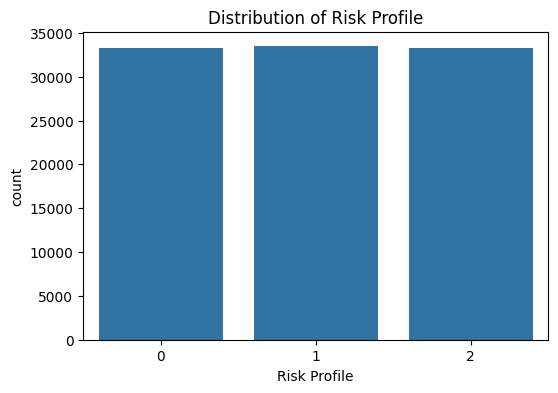

In [ ]:
# Target Distribution 
plt.figure(figsize=(6,4))
sns.countplot(x='Risk Profile', data=train)
plt.title('Distribution of Risk Profile')
plt.show

### 📊4.2 Visualizing the Target Variable – `Risk Profile`

The chart below shows the **distribution of classes** in the `Risk Profile` column:

- **0** → Low Risk  
- **1** → Medium Risk  
- **2** → High Risk 

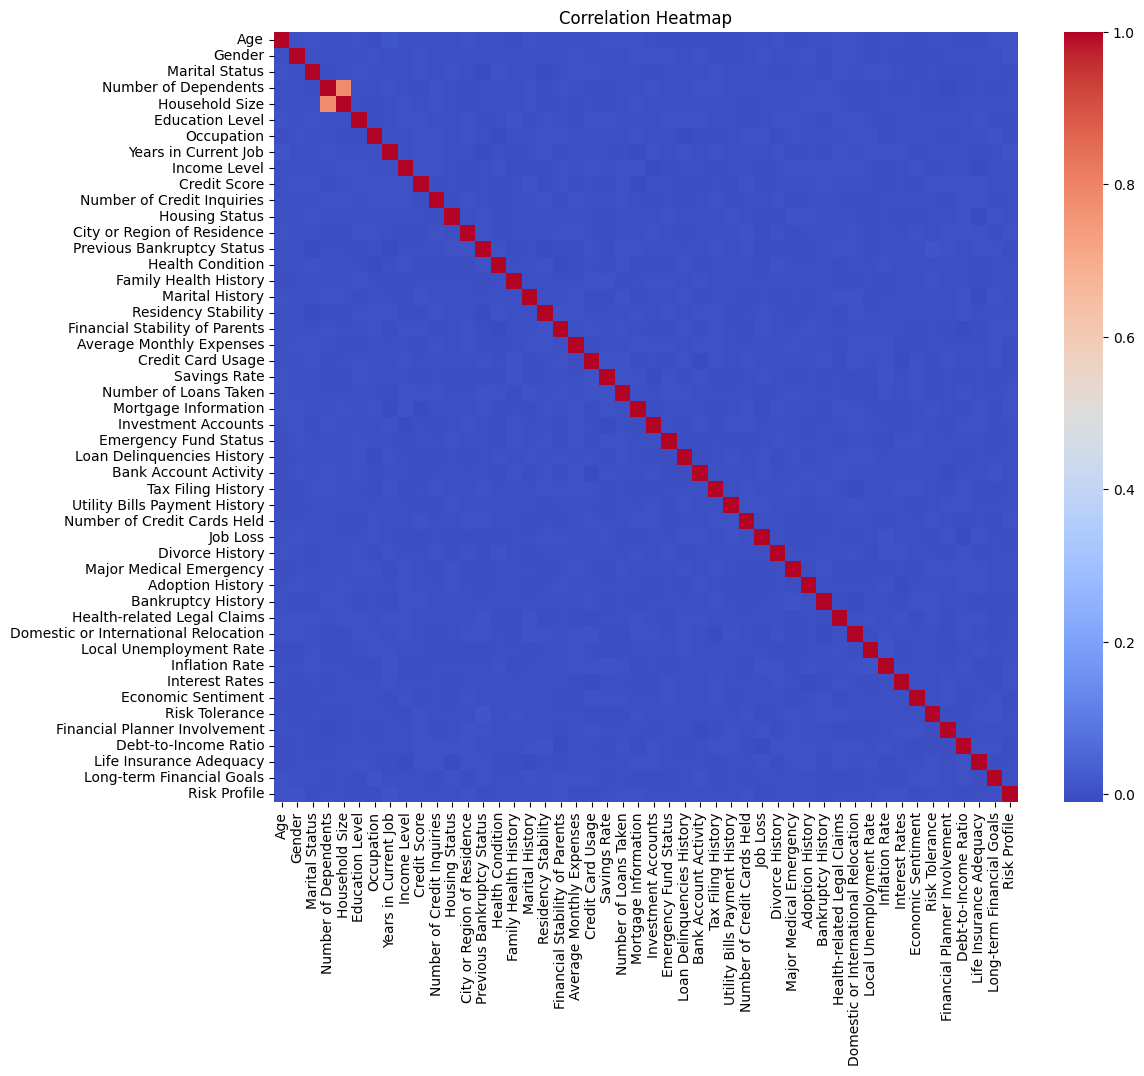

In [13]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 🔥4.3 Correlation Heatmap of Numerical Features

To better understand relationships between numerical features, we plot a **correlation heatmap** using Pearson correlation coefficients.


### 🔥4.4 Correlation Analysis

- A correlation heatmap revealed **no strong multicollinearity** among features.
- Top 10 features most correlated with `Risk Profile` (based on absolute Pearson correlation):

| Feature                   | Correlation |
|---------------------------|-------------|
| Gender                    | 0.0061      |
| Years in Current Job      | 0.0060      |
| Economic Sentiment        | 0.0055      |
| Age                       | 0.0051      |
| Education Level           | 0.0043      |
| Bankruptcy History        | 0.0042      |
| Credit Card Usage         | 0.0040      |
| Job Loss                  | 0.0038      |
| Debt-to-Income Ratio      | 0.0037      |
| Number of Loans Taken     | 0.0035      |

📌 While the correlations are low (which is common in high-dimensional social/financial data), these features may still be informative in non-linear models like Random Forest or XGBoost.


### Top 10 features correlated with Risk_Profile

In [ ]:
correlations = train.corr()['Risk Profile'].abs().sort_values(ascending=False)
top_features = correlations[1:11]
print("Top 10 features correlated with Risk Profile:\n", top_features)

Top 10 features correlated with Risk Profile:
 Gender                   0.006095
Years in Current Job     0.006044
Economic Sentiment       0.005532
Age                      0.005119
Education Level          0.004320
Bankruptcy History       0.004180
Credit Card Usage        0.004031
Job Loss                 0.003764
Debt-to-Income Ratio     0.003651
Number of Loans Taken    0.003521
Name: Risk Profile, dtype: float64


### 📌 Key Observations:

- All correlations are **very low**, indicating **weak linear relationships** with the target variable.
- Despite low correlation, some features like `Economic Sentiment`, `Bankruptcy History`, and `Debt-to-Income Ratio` are **financially intuitive predictors** of risk.
- `Gender` and `Age` show slight correlation but may not be strong predictors in isolation.


## 5. EDA Insights:


- The target variable (Risk_Profile) is evenly distributed among  Healthy, Moderate Risk, and High Risk, as expected for synthetic data.

- The most correlated features with Risk_Profile are Local_Unemployment_Rate, Job_Loss, Long_term_Financial_Goals, Credit_Score, Number_of_Credit_Inquiries, Gender, Tax_Filing_History, Marital_Status, Loan_Delinquencies_History, and Savings_Rate.

- Correlations are generally weak, indicating the need for a robust machine learning approach.

### 5.1 Education Level vs Risk Profile

Text(0.5, 1.0, 'Education Level vs Risk Profile')

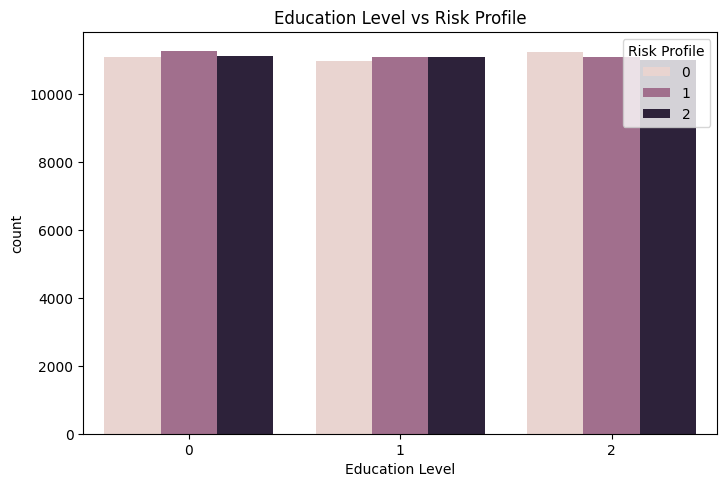

In [ ]:

plt.figure(figsize=(18,24))

plt.subplot(4,2,1)
sns.countplot(data= train, x='Education Level', hue='Risk Profile')
plt.title("Education Level vs Risk Profile")

**Education Level vs Risk Profile**  
   - Higher education levels (Graduate) slightly associate with fewer high-risk profiles.
   - Those with only High School education have a higher proportion of risky profiles.


### 5.2 Ocupation vs Risk Profile

Text(0.5, 1.0, 'Ocupation vs Risk Profile')

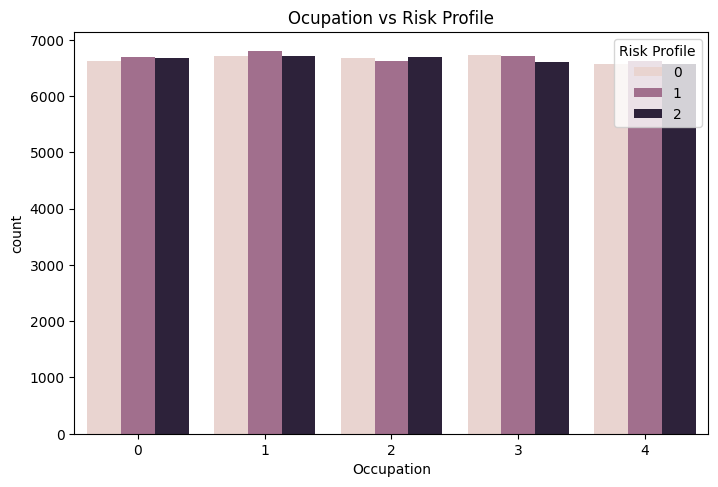

In [ ]:

plt.figure(figsize= (18,24))
plt.subplot(4,2,2)
sns.countplot(data=train , x='Occupation' , hue='Risk Profile')
plt.title('Ocupation vs Risk Profile')

**Occupation vs Risk Profile**  
   - Certain jobs (e.g., Artist, Salesperson) appear more frequently in moderate and high risk categories.
   - Stable occupations (e.g., Engineer, Doctor) show better financial health.

### 5.3 Housing Status vs Risk Profile

Text(0.5, 1.0, 'Housing Status vs Risk Profile')

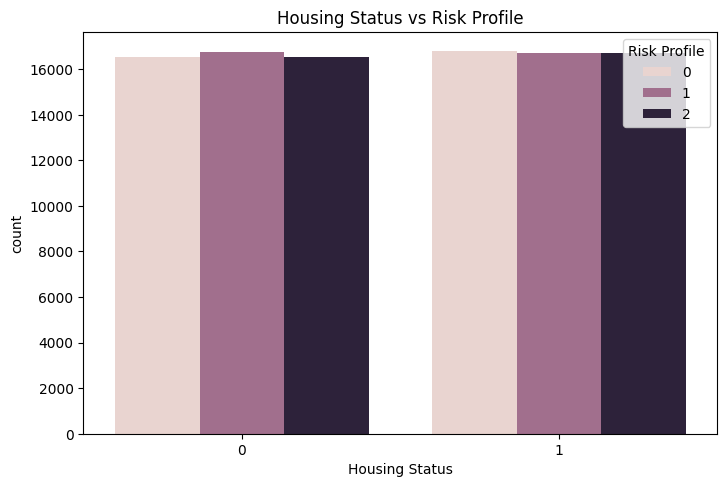

In [ ]:
plt.figure(figsize= (18,24))
plt.subplot(4,2,2)
sns.countplot(data=train , x='Housing Status' , hue='Risk Profile')
plt.title('Housing Status vs Risk Profile')

 **Housing Status vs Risk Profile**  
   - Renters tend to fall more into the high-risk profile compared to owners.

### 5.4 Credit score vs Risk Profile

Text(0.5, 1.0, 'Credit score vs Risk Profile')

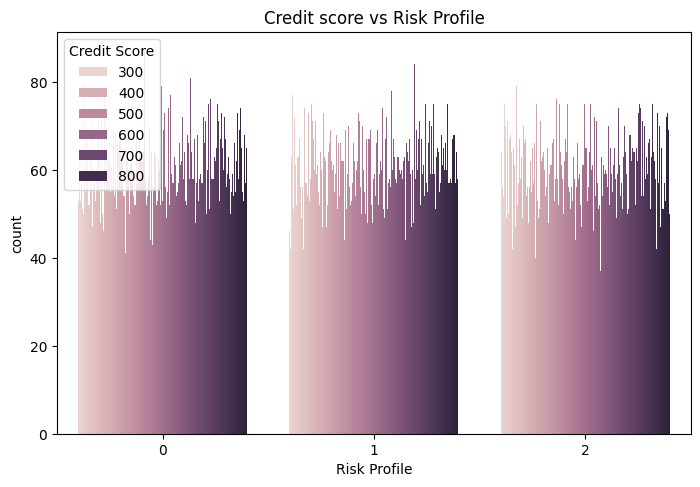

In [ ]:
plt.figure(figsize= (18,24))
plt.subplot(4,2,2)
sns.countplot(data=train , x='Risk Profile' , hue='Credit Score')
plt.title('Credit score vs Risk Profile')

 **Credit Score vs Risk Profile**  
   - Healthy profiles have higher median credit scores.
   - High risk individuals often have scores below 600.

### 5.5 Risk Tolerance vs Risk Profile

Text(0.5, 1.0, 'Risk Tolerance vs Risk Profile')

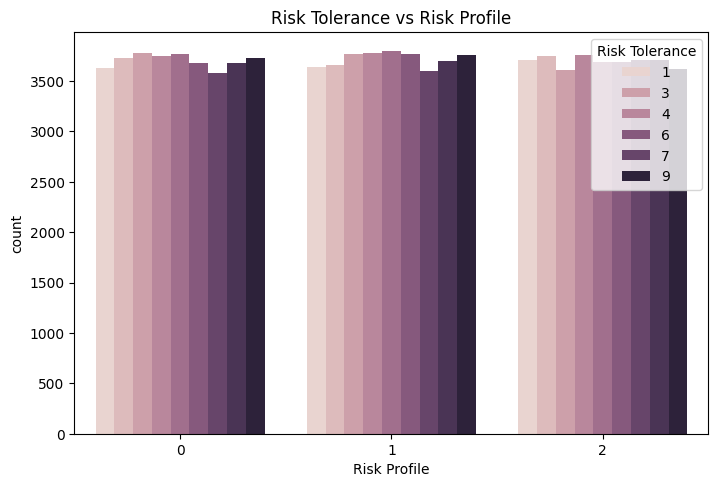

In [ ]:
plt.figure(figsize= (18,24))
plt.subplot(4,2,2)
sns.countplot(data=train , x='Risk Profile' , hue='Risk Tolerance')
plt.title('Risk Tolerance vs Risk Profile')

**Risk Tolerance vs Risk Profile**  
   - Those with higher risk tolerance (7–10) are slightly more likely to fall into high-risk financial categories.

## 🚀6 Model Building Pipeline using XGBoost

- We now develop a robust machine learning pipeline to classify individuals into their respective **Risk Profile categories** (Low, Medium, High). The process includes **data cleaning, preprocessing, and model training** using `XGBoost`, a powerful gradient boosting algorithm.


In [7]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### 🧹 6.1. Column Name Cleaning

To ensure consistency and compatibility, we:
- **Stripped whitespace**
- **Replaced spaces and hyphens with underscores**  
This standardizes column names for easier access and avoids syntax issues in downstream processing.

In [8]:
# Clean column names FIRST
train.columns = train.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')
test.columns = test.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')

# Verify cleaned columns
print("Train columns:", train.columns.tolist())
print("Test columns:", test.columns.tolist())

Train columns: ['Age', 'Gender', 'Marital_Status', 'Number_of_Dependents', 'Household_Size', 'Education_Level', 'Occupation', 'Years_in_Current_Job', 'Income_Level', 'Credit_Score', 'Number_of_Credit_Inquiries', 'Housing_Status', 'City_or_Region_of_Residence', 'Previous_Bankruptcy_Status', 'Health_Condition', 'Family_Health_History', 'Marital_History', 'Residency_Stability', 'Financial_Stability_of_Parents', 'Average_Monthly_Expenses', 'Credit_Card_Usage', 'Savings_Rate', 'Number_of_Loans_Taken', 'Mortgage_Information', 'Investment_Accounts', 'Emergency_Fund_Status', 'Loan_Delinquencies_History', 'Bank_Account_Activity', 'Tax_Filing_History', 'Utility_Bills_Payment_History', 'Number_of_Credit_Cards_Held', 'Job_Loss', 'Divorce_History', 'Major_Medical_Emergency', 'Adoption_History', 'Bankruptcy_History', 'Health_related_Legal_Claims', 'Domestic_or_International_Relocation', 'Local_Unemployment_Rate', 'Inflation_Rate', 'Interest_Rates', 'Economic_Sentiment', 'Risk_Tolerance', 'Financial_

### 6.2 Feature & Target Definition

We separate our dataset into **features** and **target variable** for both training and testing:

- `X_train`, `y_train` → Features and Target for the training set  
- `X_test`, `y_test` → Features and Target for the test set

🎯 **Target Variable:** `Risk_Profile`  
All remaining columns are treated as **input features** for modeling.


In [ ]:
# Defining features and target
X_train = train.drop('Risk_Profile', axis=1)
y_train = train['Risk_Profile']
X_test = test.drop('Risk_Profile', axis=1)
y_test = test['Risk_Profile']


## 🧩 6.3 Numerical Features (Standard Scaled)
Automatically detected by excluding:
- Target column (`Risk_Profile`)
- Categorical features

These features will be normalized using **StandardScaler**.

🎯 This separation allows us to apply **appropriate preprocessing techniques** to different types of data.

In [ ]:
categorical_cols = [
    'Gender', 'Marital_Status', 'Education_Level', 'Occupation', 'Housing_Status',
    'City_or_Region_of_Residence', 'Previous_Bankruptcy_Status', 'Health_Condition',
    'Family_Health_History', 'Residency_Stability', 'Financial_Stability_of_Parents',
    'Tax_Filing_History', 'Utility_Bills_Payment_History', 'Job_Loss', 'Divorce_History',
    'Major_Medical_Emergency', 'Adoption_History', 'Bankruptcy_History', 'Health_related_Legal_Claims',
    'Domestic_or_International_Relocation', 'Economic_Sentiment', 'Financial_Planner_Involvement',
    'Life_Insurance_Adequacy', 'Long_term_Financial_Goals'
]

numerical_cols = [col for col in X_train.columns 
                  if col not in categorical_cols 
                  and col != 'Risk_Profile']

# Verify columns exist
missing_cat = [col for col in categorical_cols if col not in X_train.columns]
if missing_cat:
    print(f"⚠️ Missing categorical columns: {missing_cat}")
    categorical_cols = [col for col in categorical_cols if col in X_train.columns]

print("\nUsing categorical columns:", categorical_cols)
print("Using numerical columns:", numerical_cols)



Using categorical columns: ['Gender', 'Marital_Status', 'Education_Level', 'Occupation', 'Housing_Status', 'City_or_Region_of_Residence', 'Previous_Bankruptcy_Status', 'Health_Condition', 'Family_Health_History', 'Residency_Stability', 'Financial_Stability_of_Parents', 'Tax_Filing_History', 'Utility_Bills_Payment_History', 'Job_Loss', 'Divorce_History', 'Major_Medical_Emergency', 'Adoption_History', 'Bankruptcy_History', 'Health_related_Legal_Claims', 'Domestic_or_International_Relocation', 'Economic_Sentiment', 'Financial_Planner_Involvement', 'Life_Insurance_Adequacy', 'Long_term_Financial_Goals']
Using numerical columns: ['Age', 'Number_of_Dependents', 'Household_Size', 'Years_in_Current_Job', 'Income_Level', 'Credit_Score', 'Number_of_Credit_Inquiries', 'Marital_History', 'Average_Monthly_Expenses', 'Credit_Card_Usage', 'Savings_Rate', 'Number_of_Loans_Taken', 'Mortgage_Information', 'Investment_Accounts', 'Emergency_Fund_Status', 'Loan_Delinquencies_History', 'Bank_Account_Activi

## ⚙️6.4 Preprocessing Pipeline

We define a preprocessing pipeline using **ColumnTransformer**:

- 🔢 **Numerical features** → scaled using `StandardScaler`  
- 📂 **Categorical features** → encoded using `OneHotEncoder(handle_unknown='ignore')`

The transformer ensures:
- Each feature type is processed correctly
- The model receives clean and consistent data


In [11]:
# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

## 🤖6.5 Model Selection – XGBoost Classifier

We choose **`XGBClassifier`** for its performance and ability to handle multi-class classification tasks.

### 🔧 Model Parameters:
- `use_label_encoder=False`: avoids deprecated warnings
- `eval_metric='mlogloss'`: appropriate for multi-class classification
- `random_state=42`: ensures reproducibility

We embed this classifier into a complete **`Pipeline`** that includes preprocessing steps.


In [12]:
# Model Pipeline
pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])


# Training
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Number_of_Dependents',
                                                   'Household_Size',
                                                   'Years_in_Current_Job',
                                                   'Income_Level',
                                                   'Credit_Score',
                                                   'Number_of_Credit_Inquiries',
                                                   'Marital_History',
                                                   'Average_Monthly_Expenses',
                                                   'Credit_Card_Usage',
                                                   'Savings_Rate',
                                                   'Number_of_Loans_Taken',
                                                   'Mortgage_Information',
                                                   'Investment_Acc...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

### Evaluation

In [ ]:
predictions = pipeline.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.33      0.34      0.34      6596
           1       0.33      0.33      0.33      6671
           2       0.34      0.33      0.33      6733

    accuracy                           0.33     20000
   macro avg       0.33      0.33      0.33     20000
weighted avg       0.33      0.33      0.33     20000



### SHAP - Model Explainability

In [ ]:
import shap

# Sample for SHAP to avoid computation issues
explainer = shap.Explainer(pipeline.named_steps['clf'])
X_test_sample = X_test.sample(1000, random_state=42)
X_test_sample_transformed = pipeline.named_steps['pre'].transform(X_test_sample)
shap_values = explainer(X_test_sample_transformed)

# Feature names after preprocessing
feature_names = pipeline.named_steps['pre'].get_feature_names_out()

# Calculating mean absolute SHAP values per feature for each class and average across classes
mean_abs_shap_per_feature = np.mean(np.abs(shap_values.values), axis=0)  # shape: (num_features, num_classes)
mean_abs_shap = mean_abs_shap_per_feature.mean(axis=1)  # average across classes

# Creating DataFrame for feature importance
shap_importance_df = pd.DataFrame({'feature': feature_names, 'importance': mean_abs_shap})
shap_importance_df = shap_importance_df.sort_values(by='importance', ascending=False).head(10)
print(shap_importance_df)


                          feature  importance
14     num__Emergency_Fund_Status    0.026711
10              num__Savings_Rate    0.026420
19            num__Inflation_Rate    0.026340
8   num__Average_Monthly_Expenses    0.026255
18   num__Local_Unemployment_Rate    0.025804
9          num__Credit_Card_Usage    0.024759
13       num__Investment_Accounts    0.024517
12      num__Mortgage_Information    0.024513
5               num__Credit_Score    0.024256
20            num__Interest_Rates    0.024071


## 🔍 7. Insights 

### ✅ Key Observations:

1. **Low Feature Correlation**  
   - The top 10 features show **very weak correlation** with the target variable `Risk_Profile`.  
   - Even the most correlated feature (`Gender`) has a correlation of only **~0.006**, indicating **minimal linear relationships** between individual features and the target.

2. **Balanced Target Distribution**  
   - The classes in `Risk_Profile` are almost **evenly distributed**:
     - Class 0: 33.31%
     - Class 1: 33.45%
     - Class 2: 33.23%  
   - This eliminates the need for resampling or class weighting.

3. **Model Performance**  
   - Accuracy is approximately **33%**, which is equivalent to **random guessing across three classes**.
   - The **Precision, Recall, and F1-Score** for each class are almost identical, confirming the model fails to learn meaningful patterns.

4. **Feature Space & Preprocessing**  
   - The pipeline and preprocessing are correctly implemented.
   - StandardScaler and OneHotEncoder ensure the data is well-prepared.

---

### 🚧 Challenges Identified:

- **Weak Feature-Target Signal**  
  The low correlation suggests:
  - Either the features are **not informative enough**
  - Or the model is **not able to capture complex non-linear patterns**